# Lab Test 2 - Group 3E2 - Turn 2

In this mock-up exam, we will be using one of the classification tasks found in OpenML. More precisely, the task [*ilpd*](https://www.openml.org/search?type=data&id=1480) (data_id=1480) is selected. This task consists of the classification of patients into liver patient of not according to the following ten features:
<ol>
<li>Age of patient (max value 90)</li>
<li>Gender of the patient</li>
<li>Total Billirubim</li>
<li>Direct Billirubim</li>
<li>Alkphos Alkaline Phosphatase</li>
<li>Sgpt Alanine Aminotransferase</li>
<li>Sgot Aspartate Aminotransferase</li>
<li>Sgot Aspartate Aminotransferase</li>
<li>Albumin</li>
<li>A/G Ratio</li>
</ol>

Below you can find a baseline result achieved with default parameters for Logistic Regression.

In [1]:
import warnings; warnings.filterwarnings("ignore"); import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data_id = 1480
test_size = 0.1
X, y = fetch_openml(data_id=data_id, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
clf = LogisticRegression(random_state=23).fit(X_train, y_train)
print(f'Test error: {(1 - accuracy_score(y_test, clf.predict(X_test)))*100:5.0f}%')

Test error:    29%


### Exercise 
Applying the logistic regression classifier, assess the effect of its parameters studied in the lab sessions on the classification error rate provided a train-test partition devoting 90%-10%, respectively. Use *random_state=23* to define this partition. In this process, try to improve the baseline result provided above on the test set. According to the results you have obtained, could you claim that this task is linearly separable? why? 

In [2]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'tol': (1e-4, 1e-2, 1, 1e2, 1e4),
    'C': (1e-2, 1e-1, 1, 1e1, 1e2),
    'max_iter': (10, 20, 50, 100)
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=23),
             param_grid={'C': (0.01, 0.1, 1, 10.0, 100.0),
                         'max_iter': (10, 20, 50, 100),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': (0.0001, 0.01, 1, 100.0, 10000.0)},
             scoring='accuracy')

In [3]:
print("Best Hyperparameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print(f"{accuracy:.1%} {1-accuracy:.1%}")

Best Hyperparameters:  {'C': 0.01, 'max_iter': 10, 'solver': 'newton-cholesky', 'tol': 0.0001}
74.6% 25.4%


In [6]:
best_model.score(X_train, y_train)

0.7309160305343512

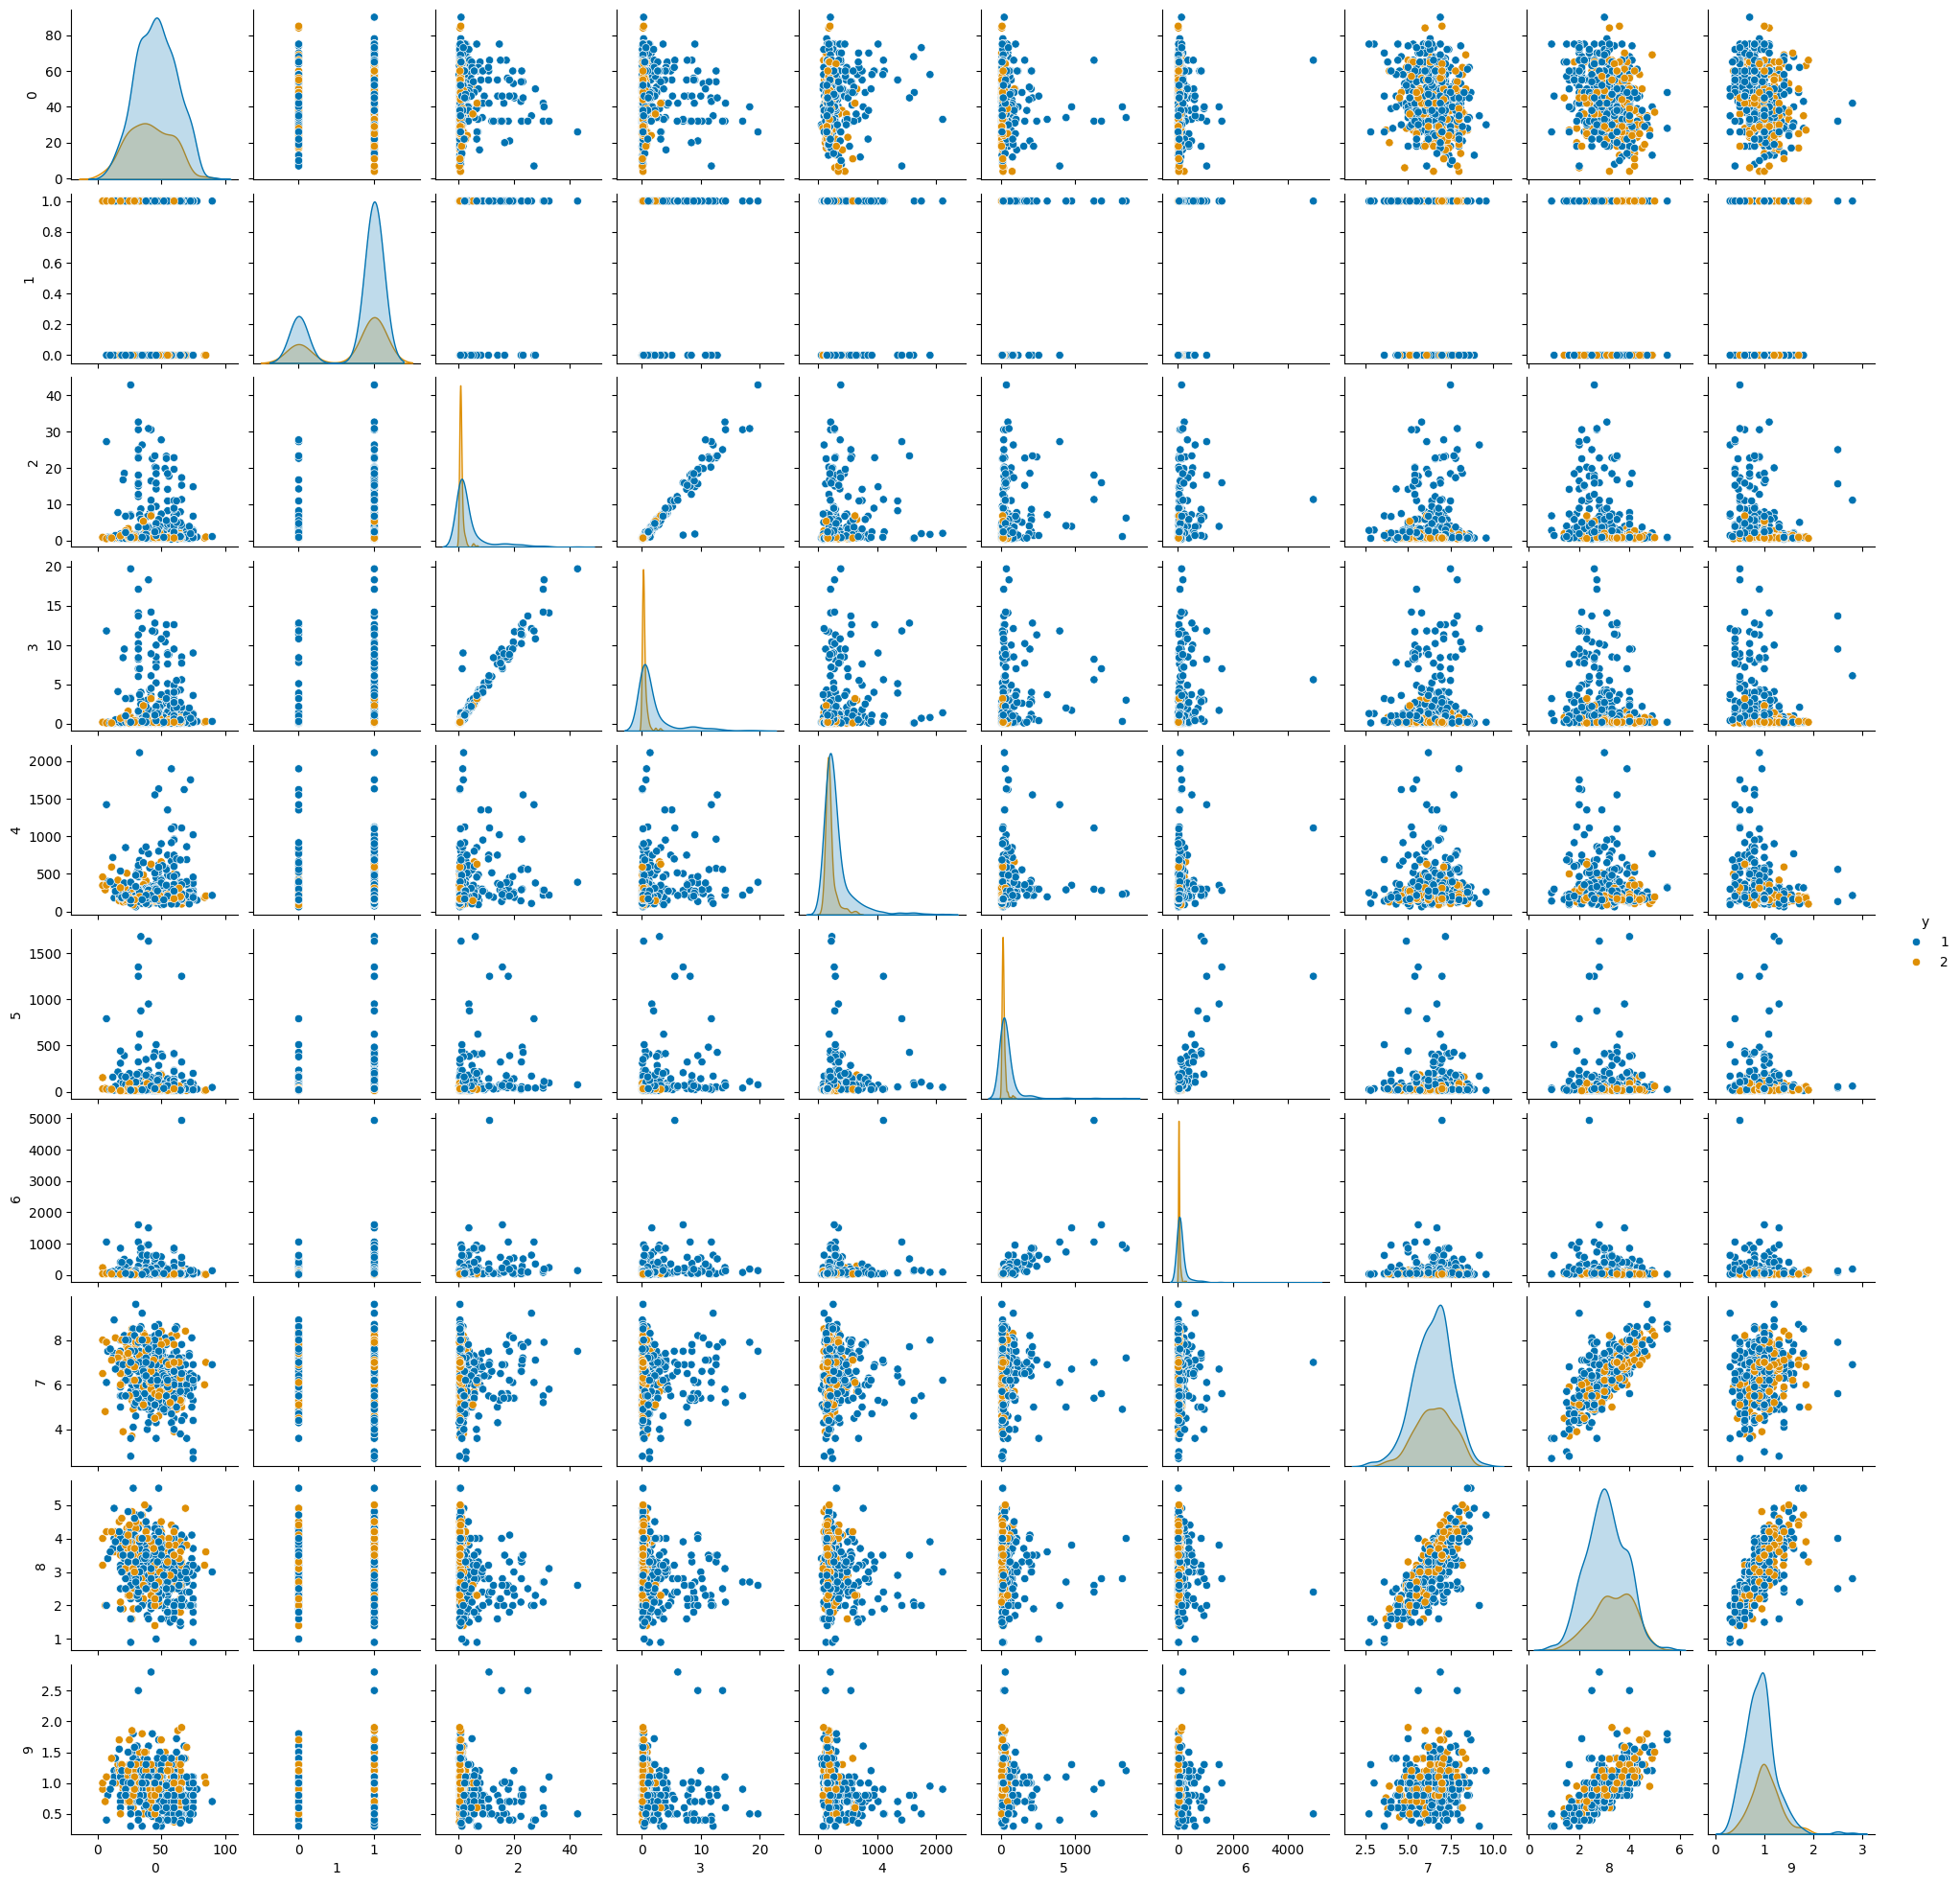

In [23]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame(X_train)
data["y"] = y_train.astype(int)
sns.pairplot(data, hue="y", height = 2, palette = 'colorblind')

Logistic regression achieves better score (loss 25.4% compared to 29%) for {'C': 0.01, 'max_iter': 10, 'solver': 'newton-cholesky', 'tol': 0.0001}. The score on the train set is simmilar. We can suspect the task is not linearly separable. The score on the train set is not close to 0, we also don't see linear separability on the pairplot.